## **Convolution Neural Networks(CNN)**
A convolutional neural network is a feed-forward neural network that is generally used to analyze visual images by processing data with grid-like topology. It’s also known as a ConvNet. A convolutional neural network is used to detect and classify objects in an image.

<div>
    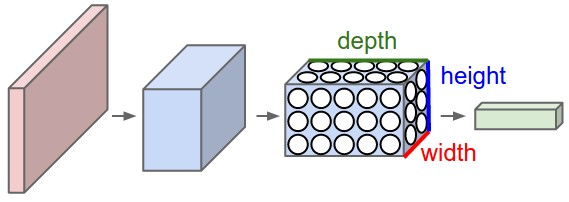
</div>

<!-- 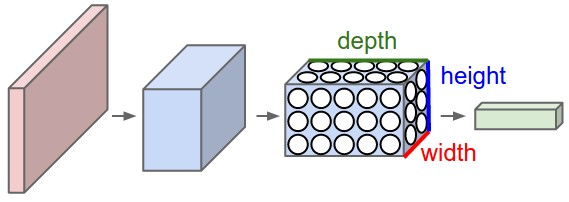 -->

### Problem with Multilayer Perceptron(MLP)
<div>
    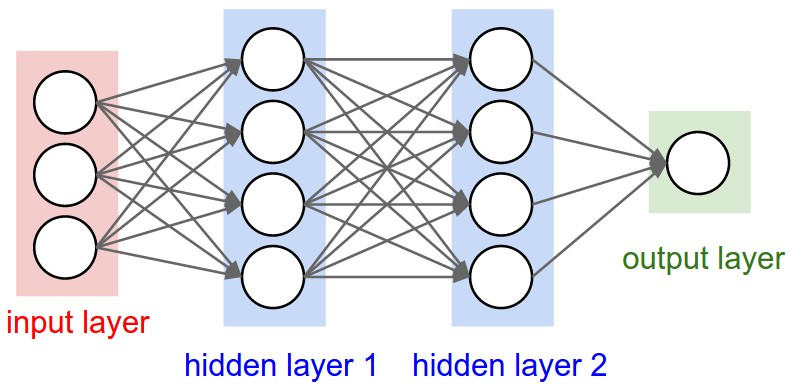
</div>
<!-- 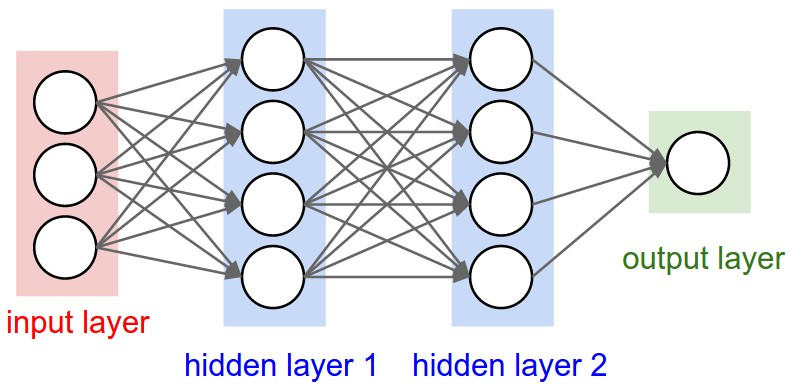 -->


MLPs use one perceptron for each input (e.g. pixel in an image) and the amount of weights rapidly becomes unmanageable for large images. It includes too many parameters because it is fully connected. Each node is connected to every other node in next and the previous layer, forming a very dense web — resulting in redundancy and inefficiency. As a result, difficulties arise whilst training and **overfitting** can occur which makes it lose the ability to generalize.

Another common problem is that MLPs react differently to an input (images) and its shifted version — they **fail to handle variance** in images - translation, rotation, illumination, size etc. For example, if a picture of a cat appears in the top left of the image in one picture and the bottom right of another picture, the MLP will try to correct itself and assume that a cat will always appear in this section of the image.

Hence, MLPs are not the best idea to use for image processing. One of the main problems is that **spatial information is lost** when the image is flattened(matrix to vector) into an MLP.


<div>
    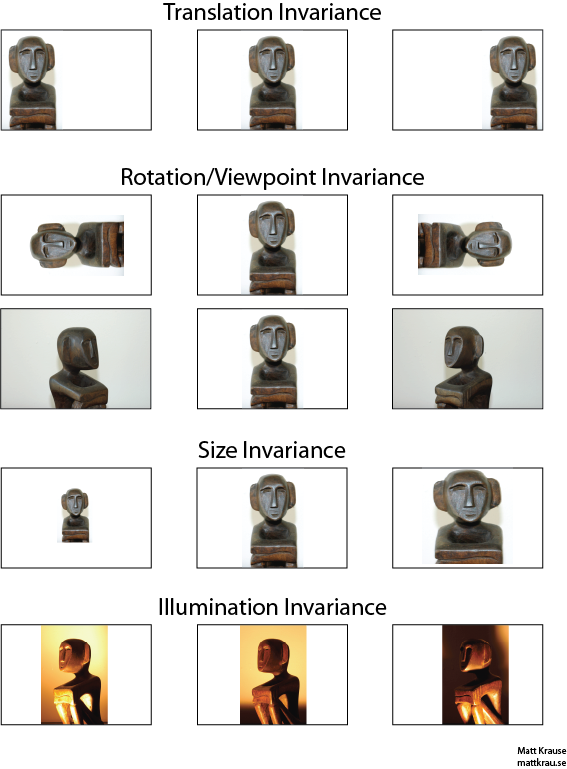
</div>

## Why CNN?

CNNs are go-to method for any type of prediction problem involving image data as an input.
The benefit of using CNNs is their ability to develop an internal representation of a two-dimensional image. This allows the model to learn position and scale in variant structures in the data, which is important when working with images.

It can account for local connectivity (each filter is panned around the entire image according to certain size and stride(no. of pixels/blocks to shift around after every convolution step), allows the filter to find and match patterns no matter where the pattern is located in a given image). The weights are smaller and shared — less wasteful, easier to train than MLP and more effective too. They can also go deeper. Layers are sparsely connected rather than fully connected.

It takes matrices as well as vectors as inputs. The layers are sparsely connected or partially connected rather than fully connected. Every node does not connect to every other node.

We move a **filter/kernel** across the image from top left to bottom right. For each point on the image, a value is calculated based on the filter using a convolution operation.
A filter could be related to anything, for pictures of humans, one filter could be associated with seeing noses, and our nose filter would give us an indication of how strongly a nose seems to appear in our image, and how many times and in what locations they occur. This reduces the number of weights that the neural network must learn compared to an MLP, and also means that when the location of these features changes it does not throw the neural network off.

<div>
    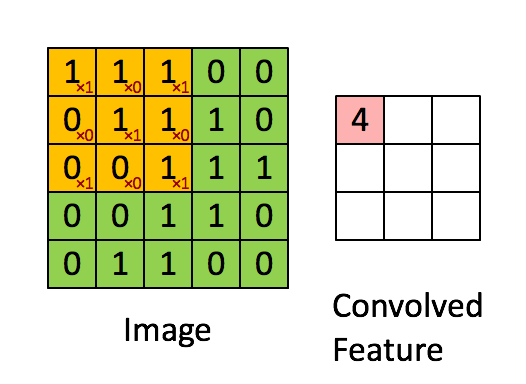
</div>


When the feature is present in part of an image, the convolution operation between the filter and that part of the image results in a real number with a high value. If the feature is not present, the resulting value is low.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
def drawImg(img,title="Image"):
    plt.imshow(img,cmap="gray")
    plt.axis("off")
    plt.style.use("seaborn")
    plt.title(title+str(img.shape))
    plt.show()

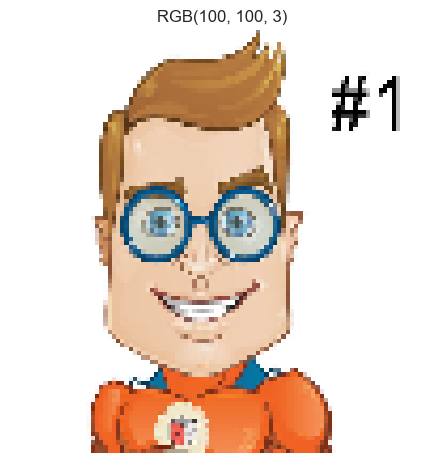

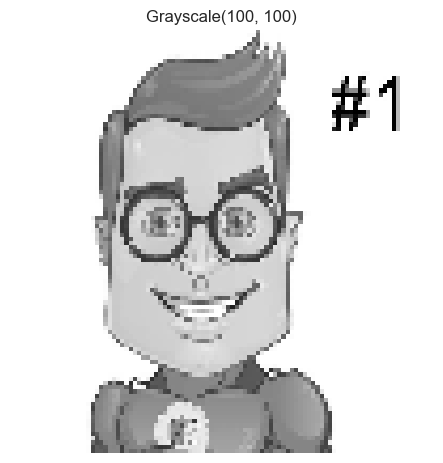

In [4]:
img_=cv2.imread("cody2.jpg") #BGR
img_=cv2.resize(img_,(100,100))
img=cv2.cvtColor(img_,cv2.COLOR_BGR2RGB)
img_gray=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
drawImg(img,"RGB")
drawImg(img_gray,"Grayscale")

In [5]:
#Hardcoded filters

def convolution(img,img_filter):
    W=img.shape[0]
    H=img.shape[1]
    
    F=img_filter.shape[0]
    new_img=np.zeros((W-F+1,H-F+1))
    
    for row in range(W-F+1):
        for col in range(H-F+1):
            for i in range(F):
                for j in range(F):
                    new_img[row][col]+=img[row+i][col+j]*img_filter[i][j]
                
                if new_img[row][col]>255:
                    new_img[row][col]=255
                    
                elif new_img[row][col]<0:
                    new_img[row][col]=0
                    
    return new_img #Activation Map

In [6]:
blur_filter=np.ones((3,3))/9.0

output1=convolution(img_gray,blur_filter)

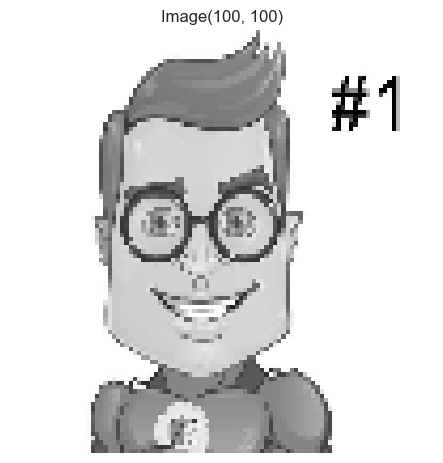

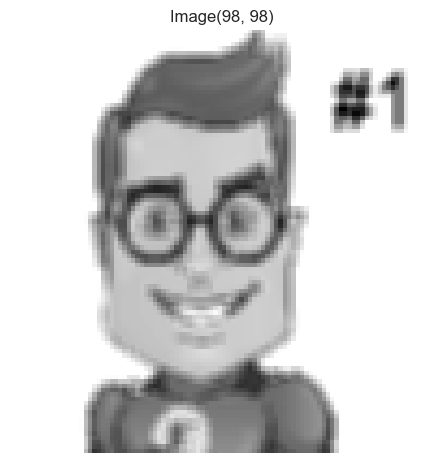

In [7]:
drawImg(img_gray)
drawImg(output1)

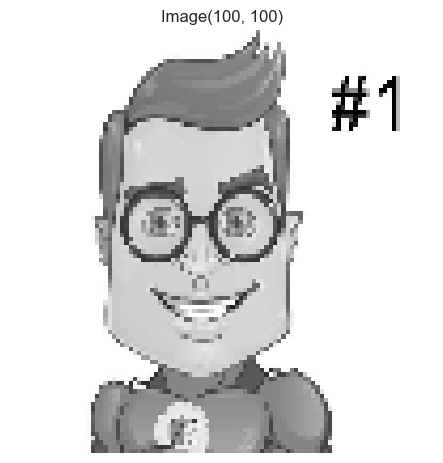

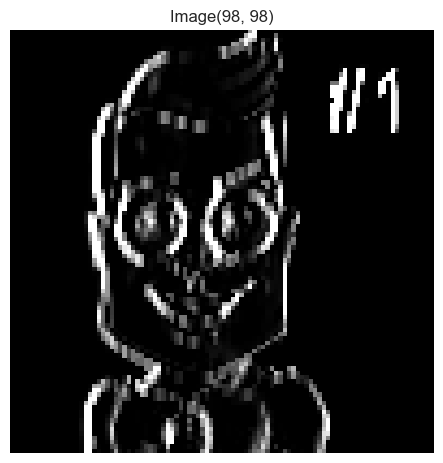

In [9]:
edge_filter=np.array([[1,0,-1],
                     [1,0,-1],
                     [1,0,-1]])
#detecting vertical edges
output2=convolution(img_gray,edge_filter)
drawImg(img_gray)
drawImg(output2)

## Convolution Layer
<ul>
    <li>contains various filters</li>
    <li>each filter extracts different kinds of features and gives 1 activation map</li>
    <li>multiple activation maps are combined by stacking to form output volume</li>
    <li>so CNN layer takes input a volume and produces an output volume of different shape</li>
</ul>
    
## Stride
<ul>
    <li>Filters can have different size as well as movement</li>
    <li>Stride defines how a filter should move across the image</li>
    <li>No of pixels we skip each time is called stride</li>
</ul>

## Padding
<ul>
    <li>Convolution operation we have seen reduces "H" and "W" of original image</li>
    <li>But sometimes we want the output image to have same size as input image</li>
    <li>So we can achieve this by adding 0 value pixels(neurons) outside the original image, called    Padding</li>
</ul>

(100, 100, 3)


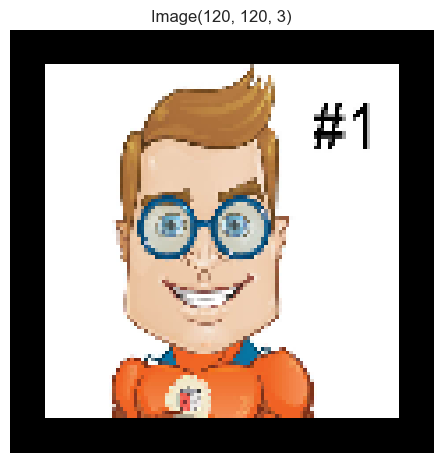

In [10]:
print(img.shape)

pad_img=np.pad(img,((10,10),(10,10),(0,0)),'constant',constant_values=0)
drawImg(pad_img)

## Pooling Layers

Pooling is performed after Convolution Operation

Two types of pooling layer - Average Pooling and Max Pooling
<ul>
    <li>Max-pooling layer: slides an (f,f) window over the input and stores the max value of the  window in the output.</li>
    <li>Average-pooling layer: slides an (f,f) window over the input and stores the average value of the window in the output.</li>
</ul>

It helps to reduce computation by discarding 75% of the neurons(assuming 2X2 filters with stride of 2)

Makes feature detectors more robust

No parameters for learning, only hyperparameters such as filter size and type of pooling.

<div>
    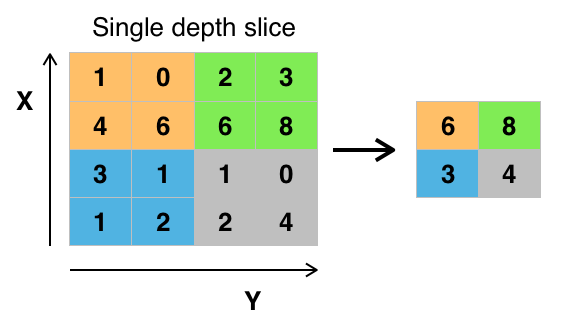
</div>

In [11]:
X=np.array([[1,0,2,3],
            [4,6,6,8],
            [3,1,1,0],
            [1,2,2,4]])

def pooling(X,mode="max"):
    stride=2
    f=2
    H,W=X.shape
    
    HO=int((H-f)/stride)+1
    WO=int((W-f)/stride)+1
    
    output=np.zeros((HO,WO))
    
    for r in range(HO):
        for c in range(WO):
            r_start=r*stride
            r_end=r_start+f
            c_start=c*stride
            c_end=c_start+f
            
            X_slice=X[r_start:r_end,c_start:c_end]
            if mode=="max":
                output[r][c]=np.max(X_slice)
            else:
                output[r][c]=np.mean(X_slice)
                
    return output

In [12]:
pooling_output=pooling(X)
print(pooling_output)

[[6. 8.]
 [3. 4.]]


## General CNN Architecture

<div>
    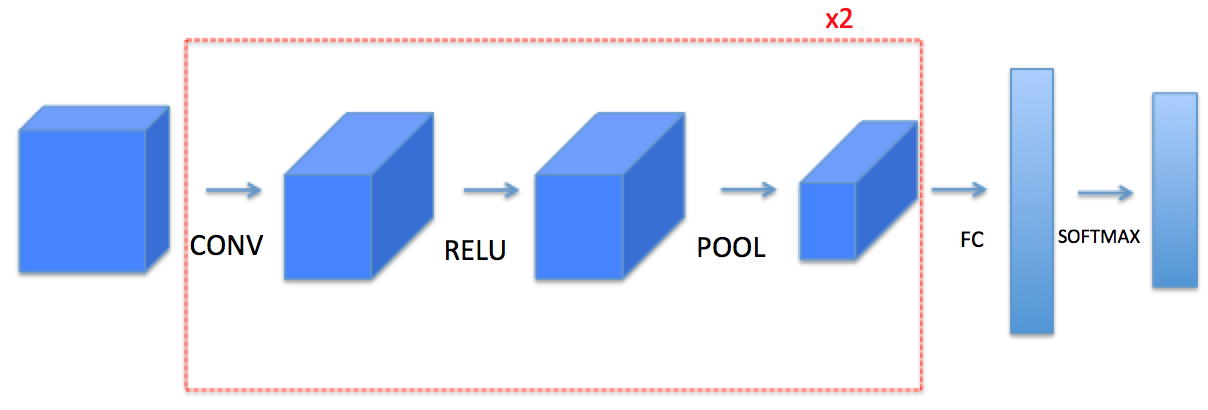
</div>


[Conv Layers--> ReLu--->Pooling] --> FC -->Softmax